In [1]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install -c conda-forge descartes

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
#import all packages
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
from geopandas import GeoDataFrame
from sklearn.model_selection import train_test_split
# Import Statsmodel functions:
import statsmodels.formula.api as smf

%matplotlib inline

In [5]:
#load data
df = pd.read_csv("./vehicles.csv")

In [6]:
#get an idea of what the data looks like
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [7]:
#describe data
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [8]:
#check if there are NA values
df.isnull().values.any()

True

In [9]:
#Create a copy of dataset and start cleaning

#drop columns with all na values
df_copy = df.dropna(axis=1, how='all')

#drop columns that I deemed not important towards my analysis
df_copy = df.drop(columns=['VIN', 'county','url','region_url','description', 'title_status'])

In [10]:
#clean data by removing all rows with null values for each variable
df_copy2 = df_copy[df_copy['condition'].notna()]
df_copy3 = df_copy2[df_copy['cylinders'].notna()]
df_copy4 = df_copy3[df_copy['transmission'].notna()]
df_copy5 = df_copy4[df_copy['manufacturer'].notna()]
df_copy6 = df_copy5[df_copy['drive'].notna()]
df_copy7 = df_copy6[df_copy['size'].notna()]
df_copy8 = df_copy7[df_copy['odometer'].notna()]
df_copy9 = df_copy8[df_copy['model'].notna()]
df_copy10 = df_copy9[df_copy['type'].notna()]
df_copy11 = df_copy10[df_copy['paint_color'].notna()]
df_copy12 = df_copy11[df_copy['lat'].notna()]
df_final = df_copy12[df_copy['long'].notna()]

<ipython-input-10-a996c6a07864>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy3 = df_copy2[df_copy['cylinders'].notna()]
<ipython-input-10-a996c6a07864>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy4 = df_copy3[df_copy['transmission'].notna()]
<ipython-input-10-a996c6a07864>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy5 = df_copy4[df_copy['manufacturer'].notna()]
<ipython-input-10-a996c6a07864>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy6 = df_copy5[df_copy['drive'].notna()]
<ipython-input-10-a996c6a07864>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy7 = df_copy6[df_copy['size'].notna()]
<ipython-input-10-a996c6a07864>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy8 = df_copy7[df_copy['odometer'].notna()]
<ipython-input-10-a996c6a0

In [11]:
#sum of nulls values per column
df_final[df_copy.columns[df_copy.isnull().any()]].isnull().sum()

year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
size            0
type            0
paint_color     0
image_url       0
lat             0
long            0
posting_date    0
dtype: int64

In [12]:
#change variables type
df_final['id'] = df_final['id'].astype(str)
df_final['price'] = df_final['price'].astype("float")
df_final['condition'] = df_final['condition'].astype("category")
df_final['cylinders'] = df_final['cylinders'].astype("category")
df_final['fuel'] = df_final['fuel'].astype("category")
df_final['transmission'] = df_final['transmission'].astype("category")
df_final['drive'] = df_final['drive'].astype("category")
df_final['size'] = df_final['size'].astype("category")
df_final['type'] = df_final['type'].astype("category")


In [13]:
#Seperate Date and Time into two columns
df_final[['date', 'time']] = df_final.posting_date.str.split("T", expand=True)
df_final[['time', 'seconds']] = df_final.time.str.split("-", expand=True)

#convert variable date to date type
df_final['date'] = df_final['date'].astype("datetime64")

In [14]:
df_final.dtypes

id                      object
region                  object
price                  float64
year                   float64
manufacturer            object
model                   object
condition             category
cylinders             category
fuel                  category
odometer               float64
transmission          category
drive                 category
size                  category
type                  category
paint_color             object
image_url               object
state                   object
lat                    float64
long                   float64
posting_date            object
date            datetime64[ns]
time                    object
seconds                 object
dtype: object

In [15]:
df_final

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,type,paint_color,image_url,state,lat,long,posting_date,date,time,seconds
31,7316356412,auburn,15000.0,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,...,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,al,32.592000,-85.518900,2021-05-03T14:02:03-0500,2021-05-03,14:02:03,0500
55,7314560853,auburn,19900.0,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,...,pickup,blue,https://images.craigslist.org/01313_4Y4oq6ZXyp...,al,32.547500,-85.468200,2021-04-29T17:19:18-0500,2021-04-29,17:19:18,0500
59,7313406529,auburn,14000.0,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,...,mini-van,silver,https://images.craigslist.org/00W0W_2r54x5TNSv...,al,32.628739,-85.461820,2021-04-27T12:20:01-0500,2021-04-27,12:20:01,0500
65,7312847466,auburn,22500.0,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,...,truck,white,https://images.craigslist.org/00606_94zWvEubE9...,al,32.630400,-85.401600,2021-04-26T11:15:36-0500,2021-04-26,11:15:36,0500
73,7312144944,auburn,15000.0,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,...,sedan,grey,https://images.craigslist.org/00606_8FSUUIa2V3...,al,32.822400,-85.770400,2021-04-24T18:39:59-0500,2021-04-24,18:39:59,0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426808,7302963673,wyoming,18000.0,2005.0,chevrolet,silverado 1500 lt 4x4,excellent,8 cylinders,gas,130000.0,...,truck,blue,https://images.craigslist.org/01313_a8bv1lfbhR...,wy,43.452800,-110.739300,2021-04-06T21:04:03-0600,2021-04-06,21:04:03,0600
426809,7302963273,wyoming,18000.0,1990.0,jeep,gand wagoneer,good,8 cylinders,gas,114400.0,...,SUV,black,https://images.craigslist.org/00g0g_iKspzwitCl...,wy,43.452800,-110.739300,2021-04-06T21:02:26-0600,2021-04-06,21:02:26,0600
426831,7302384818,wyoming,9800.0,1985.0,nissan,300zx coupe with t-tops,like new,6 cylinders,gas,115000.0,...,hatchback,red,https://images.craigslist.org/00h0h_hGbhVx97PY...,wy,41.143700,-104.796200,2021-04-05T18:10:52-0600,2021-04-05,18:10:52,0600
426833,7302338378,wyoming,6800.0,1997.0,jaguar,xk8 convertible,good,8 cylinders,gas,69550.0,...,convertible,white,https://images.craigslist.org/00a0a_glcFDSsitm...,wy,43.642930,-108.222976,2021-04-05T16:29:38-0600,2021-04-05,16:29:38,0600


In [16]:
#optional
#import states data from census website
states = gpd.read_file('tl_2021_us_state.shp')
type(states)

geopandas.geodataframe.GeoDataFrame

In [17]:
#optional
states.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266298634,489204185,+38.6472854,-080.6183274,"POLYGON ((-80.85847 37.42831, -80.85856 37.428..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138961722096,45972570361,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778561906,6216493488,+40.1028754,-089.1526108,"POLYGON ((-89.17208 37.06831, -89.17296 37.067..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206232627084,18949394733,+46.3159573,-094.1996043,"POLYGON ((-92.74568 45.29604, -92.74629 45.295..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151992308,6979074857,+38.9466584,-076.6744939,"POLYGON ((-75.76659 39.37756, -75.76630 39.373..."


In [18]:
#optional
states.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [19]:
#remove rows that contain specific state names
states_1 = states[states["NAME"].str.contains('Alaska')==False]
states_2 = states_1[states_1["NAME"].str.contains('United States Virgin Islands')==False]
states_3 = states_2[states_2["NAME"].str.contains('Commonwealth of the Northern Mariana Islands')==False]
states_4 = states_3[states_3["NAME"].str.contains('Guam')==False]
states_5 = states_4[states_4["NAME"].str.contains('American Samoa')==False]
states_6 = states_5[states_5["NAME"].str.contains('Puerto Rico')==False]
states_f = states_6[states_6["NAME"].str.contains('Hawaii')==False]

In [20]:
#optional
states_f

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266298634,489204185,+38.6472854,-080.6183274,"POLYGON ((-80.85847 37.42831, -80.85856 37.428..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138961722096,45972570361,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778561906,6216493488,+40.1028754,-089.1526108,"POLYGON ((-89.17208 37.06831, -89.17296 37.067..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206232627084,18949394733,+46.3159573,-094.1996043,"POLYGON ((-92.74568 45.29604, -92.74629 45.295..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151992308,6979074857,+38.9466584,-076.6744939,"POLYGON ((-75.76659 39.37756, -75.76630 39.373..."
5,1,1,44,01219835,44,RI,Rhode Island,00,G4000,A,2677763359,1323686988,+41.5964850,-071.5264901,"MULTIPOLYGON (((-71.67881 41.15891, -71.67626 ..."
6,4,8,16,01779783,16,ID,Idaho,00,G4000,A,214049931578,2391569647,+44.3484222,-114.5588538,"POLYGON ((-111.04547 43.50105, -111.04540 43.4..."
7,1,1,33,01779794,33,NH,New Hampshire,00,G4000,A,23190115212,1025971768,+43.6726907,-071.5843145,"POLYGON ((-71.24548 42.74251, -71.24809 42.740..."
8,3,5,37,01027616,37,NC,North Carolina,00,G4000,A,125933327733,13456093195,+35.5397100,-079.1308636,"POLYGON ((-76.91598 36.54388, -76.91620 36.544..."
9,1,1,50,01779802,50,VT,Vermont,00,G4000,A,23872569964,1030754609,+44.0589536,-072.6710173,"POLYGON ((-72.43462 43.23326, -72.43436 43.232..."


In [21]:
#assign specifc gps
states_f = states_f.to_crs("EPSG:3395")

<AxesSubplot:>

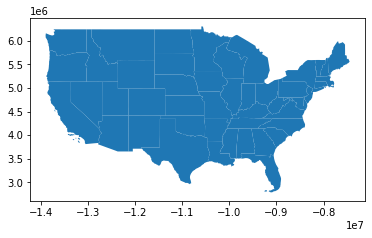

In [22]:
#optional
states_f.plot()

(-14220747.743951684,
 -7123030.035352984,
 2607943.6717206566,
 6484088.054341827)

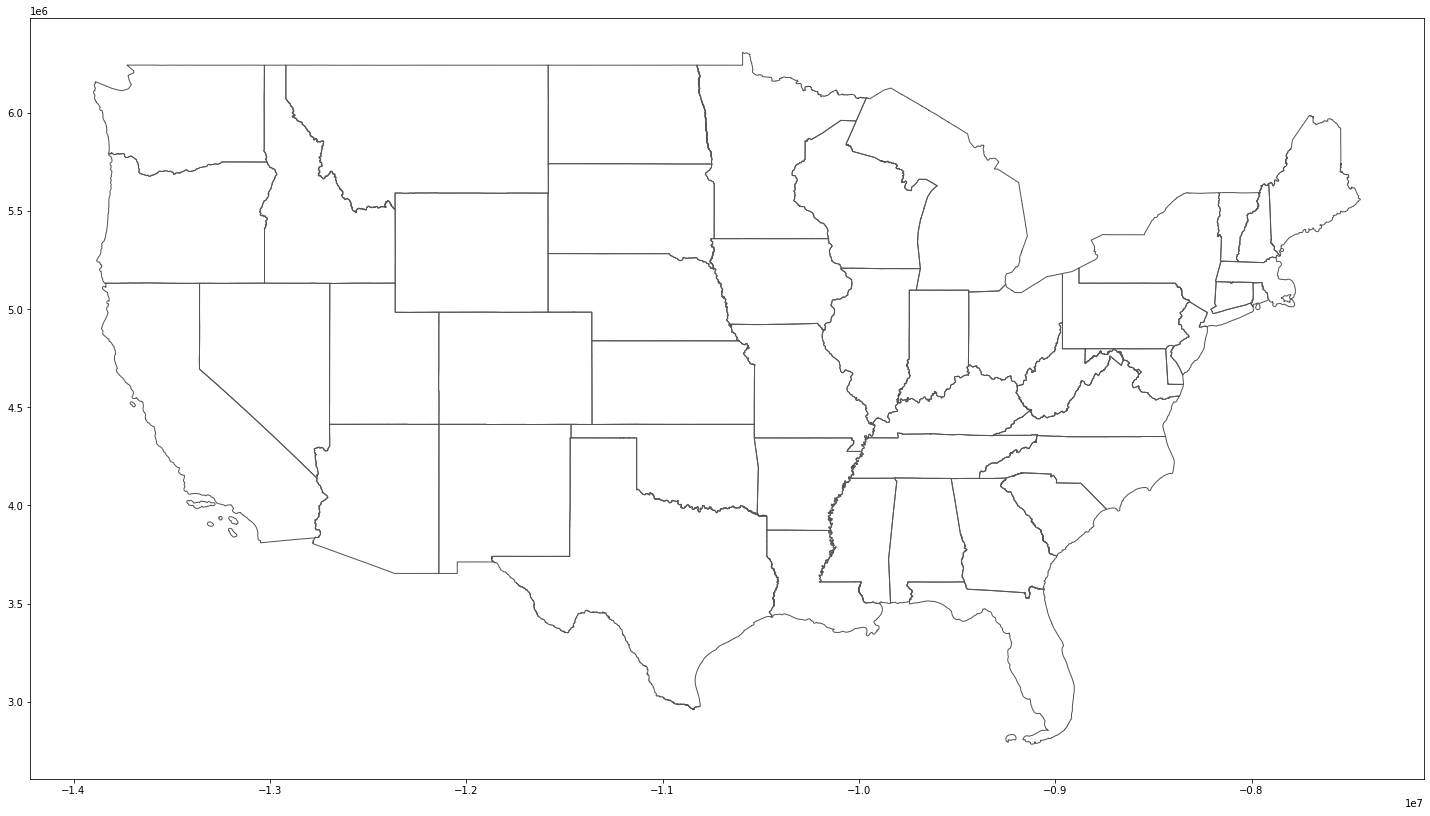

In [23]:
#create final us map
#optional
us_map = states_f.boundary.plot(figsize=(25, 14),  color="#555555", linewidth=1)
us_map.axis('on')

In [24]:
#optional
geometry = [Point(xy) for xy in zip(df_final['long'], df_final['lat'])]
gdf = GeoDataFrame(df_final, geometry=geometry)   


<AxesSubplot:>

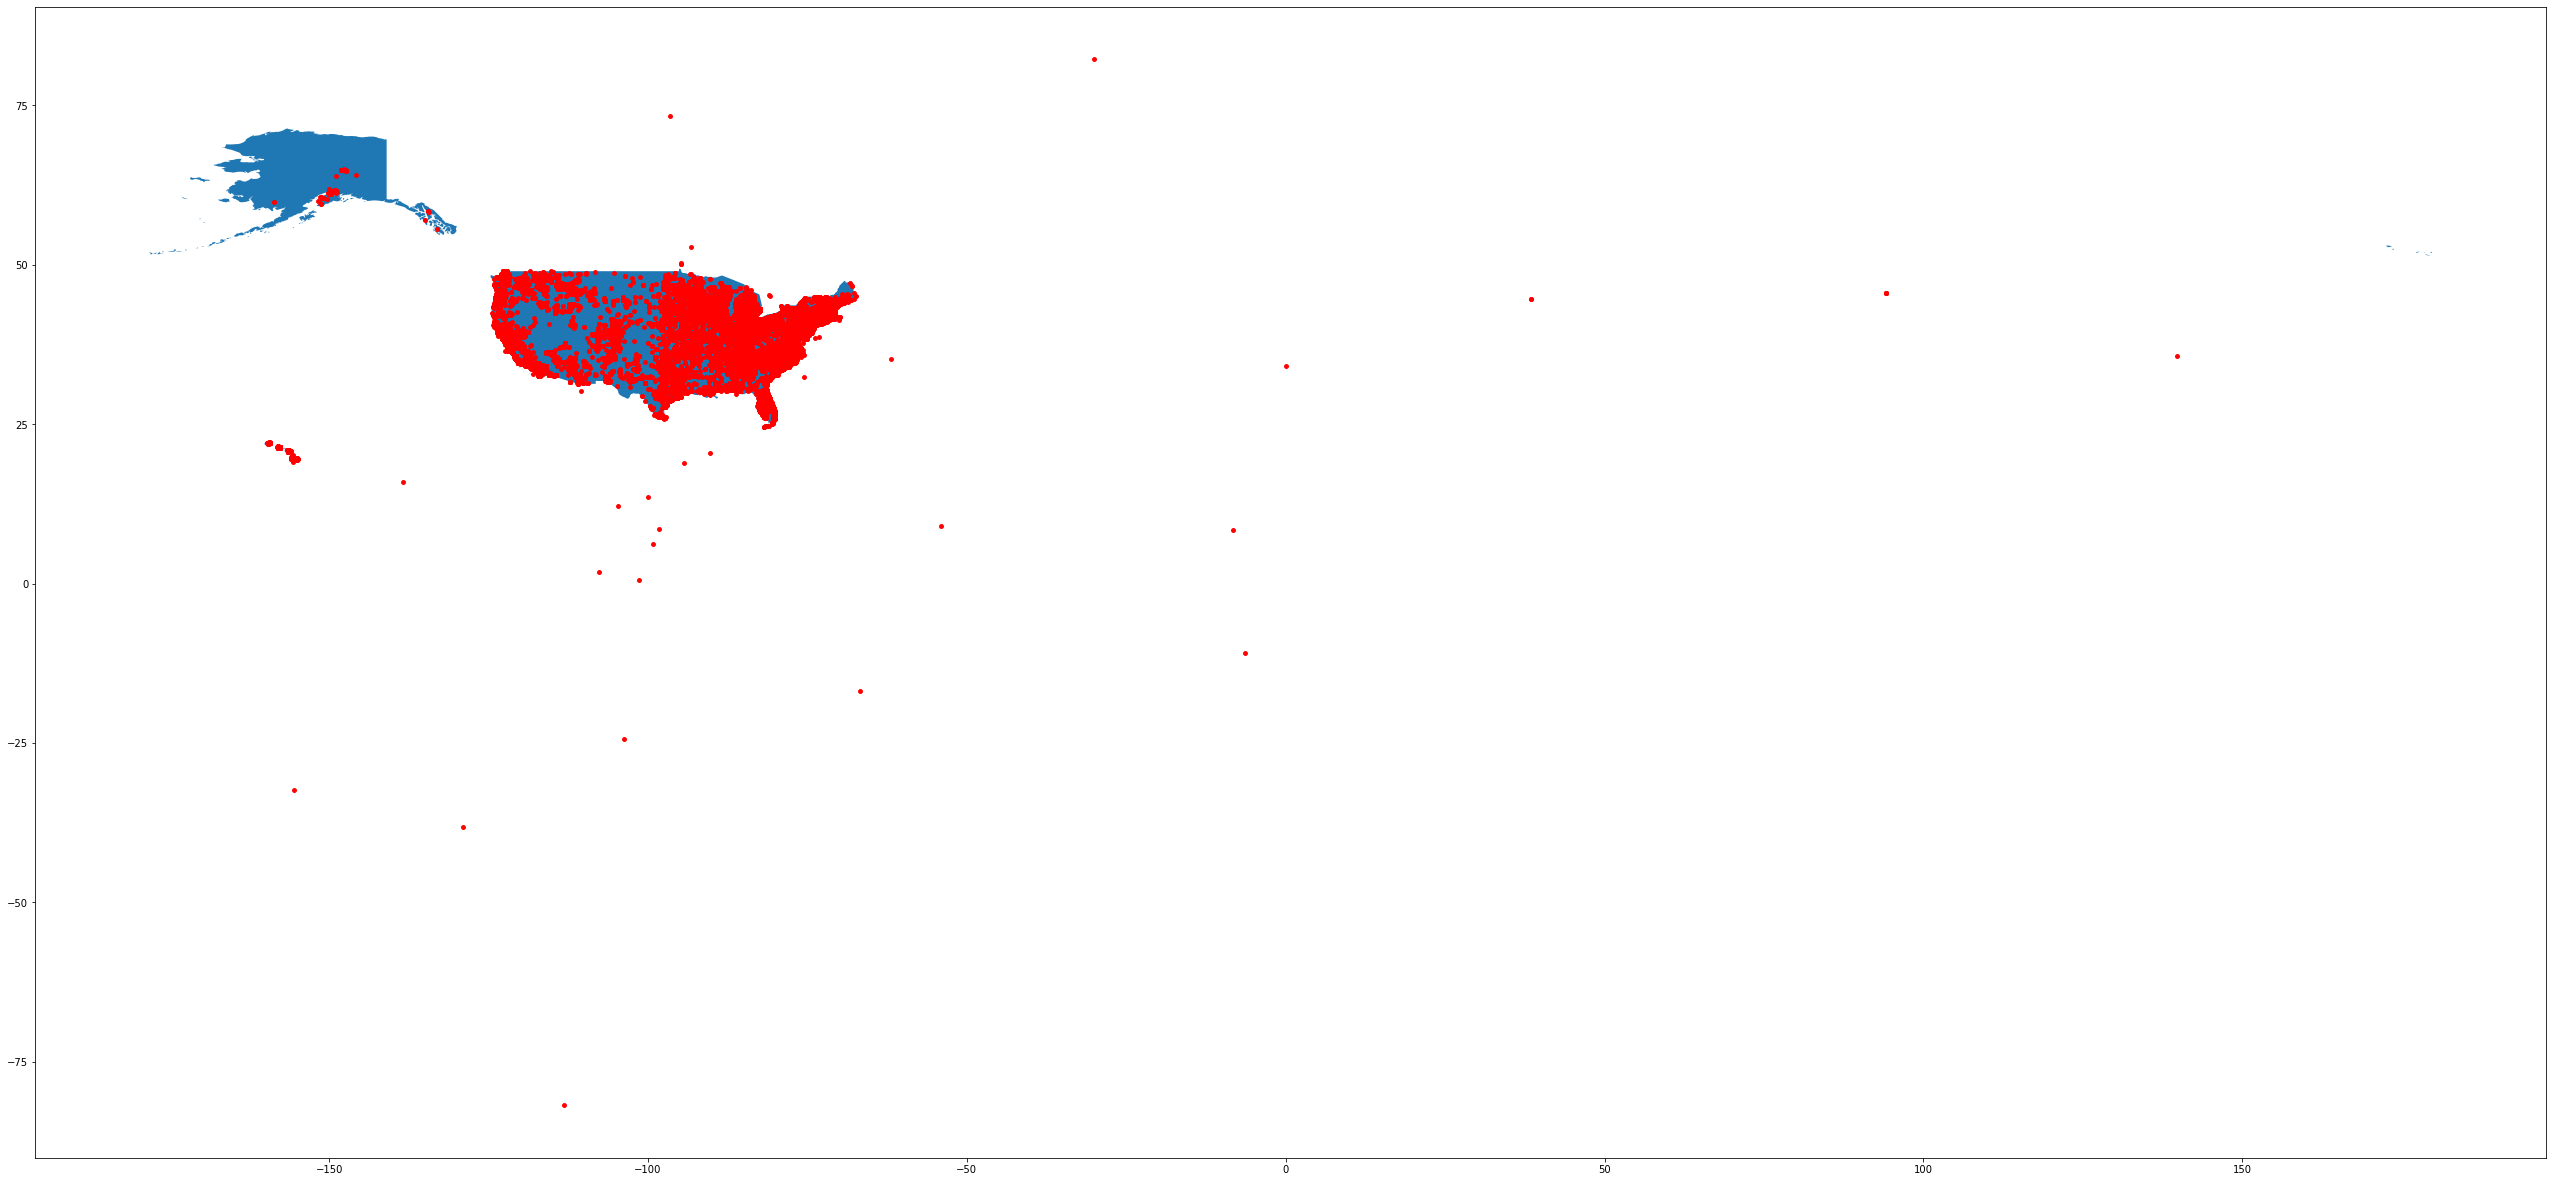

In [25]:
#optional
world = gpd.read_file('ne_50m_admin_0_countries.shp')
usa = world[world["ADMIN"].str.contains('United States of America')==True]
gdf.plot(ax=usa.plot(figsize=(45, 25)), marker='o', color='red', markersize=15)

# Q1 Which manufacturer has the most used cars for sale?

Text(0.5, 1.0, 'Count of Cars per Manufacturers')

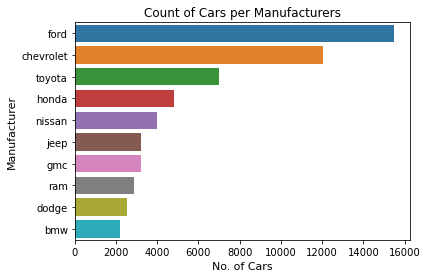

In [26]:
#visualize which manufacturer have the most cars for sale (top 10)
graph = sns.countplot(y = 'manufacturer', data = df_final, order =df_final['manufacturer'].value_counts().iloc[:10].index)
graph.set_xlabel('No. of Cars',size=11)
graph.set_ylabel('Manufacturer',size=11)
plt.title('Count of Cars per Manufacturers')

# Q2 Which states have the most used cars for sale?

Text(0.5, 1.0, 'Count of Cars per State')

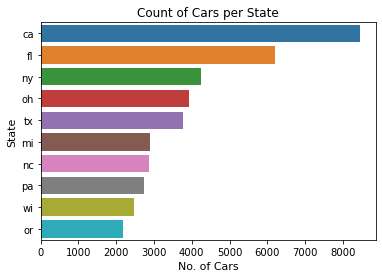

In [27]:
#visualize which states have the most cars for sale (top 10)
graph = sns.countplot(y = 'state', data = df_final, order =df_final['state'].value_counts().iloc[:10].index)
graph.set_xlabel('No. of Cars',size=11)
graph.set_ylabel('State',size=11)
plt.title('Count of Cars per State')

# Q3 Relationship between price and year, and price and odometer

Text(0.5, 1.0, 'Relationship between price and year of make')

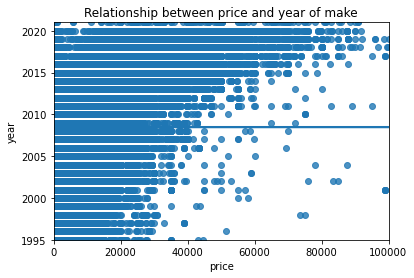

In [28]:
rel = sns.regplot(x='price', y='year', data=df_final)
rel.set(ylim=(1995, 2021))
rel.set(xlim=(0,100000))
plt.title("Relationship between price and year of make")

Text(0.5, 1.0, 'Relationship between price and odometer reading')

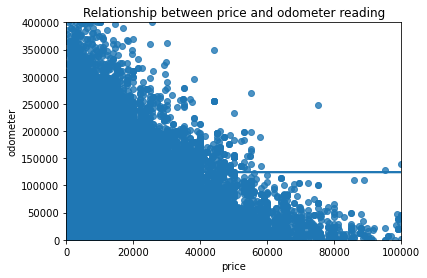

In [29]:
rel = sns.regplot(x='price', y='odometer', data=df_final)
rel.set(ylim=(0, 400000))
rel.set(xlim=(0,100000))
plt.title("Relationship between price and odometer reading")

In [30]:
lm = smf.ols(formula='price ~ year + odometer', data=df_final).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1020
Date:                Wed, 09 Mar 2022   Prob (F-statistic):              0.903
Time:                        13:47:00   Log-Likelihood:            -1.4117e+06
No. Observations:               79016   AIC:                         2.823e+06
Df Residuals:                   79013   BIC:                         2.823e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    4.23e+06   9.97e+06      0.424      0.6